In [13]:
import pandas as pd

# Define the correct file path
file_path = r"C:\Users\magar\OneDrive\Desktop\SAS Curiosity CUp\Dataset\1978 to 2025 uk station data .xlsx"


# Load the dataset
df = pd.read_excel(file_path)

# Display basic info about the dataset
print("Dataset Overview:")
print(df.info())  # Check column names, data types, and missing values

# Show the first few rows to understand the structure
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Display unique column names to check for errors
print("\nColumn Names in Dataset:")
print(df.columns)


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19484 entries, 0 to 19483
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StationName   19484 non-null  object 
 1   Year          19484 non-null  int64  
 2   Month         19484 non-null  int64  
 3   MaxTemp       19484 non-null  float64
 4   MinTemp       19484 non-null  float64
 5   AvgTemp       19484 non-null  float64
 6   DaysAirFrost  19484 non-null  float64
 7   Rain          19484 non-null  float64
 8   Sun           19484 non-null  float64
 9   Longitude     19484 non-null  float64
 10  Latitude      19484 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.6+ MB
None

First 5 Rows of the Dataset:
  StationName   Year  Month  MaxTemp   MinTemp  AvgTemp  DaysAirFrost   Rain  \
0    Aberporth  1974      1       8.6      3.8     6.20           2.0  203.2   
1    Aberporth  1974      2       7.9      3.1     5.50  

In [15]:
# Remove spaces from column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names
print("✅ Cleaned Column Names:")
print(df.columns)



✅ Cleaned Column Names:
Index(['StationName', 'Year', 'Month', 'MaxTemp', 'MinTemp', 'AvgTemp',
       'DaysAirFrost', 'Rain', 'Sun', 'Longitude', 'Latitude'],
      dtype='object')


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("\n🔍 Missing Values in Each Column:")
print(missing_values)



🔍 Missing Values in Each Column:
StationName     0
Year            0
Month           0
MaxTemp         0
MinTemp         0
AvgTemp         0
DaysAirFrost    0
Rain            0
Sun             0
Longitude       0
Latitude        0
dtype: int64


In [19]:
# Ensure correct data types
print("\n🔍 Data Types:")
print(df.dtypes)



🔍 Data Types:
StationName      object
Year              int64
Month             int64
MaxTemp         float64
MinTemp         float64
AvgTemp         float64
DaysAirFrost    float64
Rain            float64
Sun             float64
Longitude       float64
Latitude        float64
dtype: object


In [31]:
import pandas as pd

# Define function to find last frost of winter-spring (Jan–May)
def last_spring_frost(group):
    frost_months = group[(group["Month"] <= 5) & (group["DaysAirFrost"] > 0)]
    return frost_months["Month"].max() if not frost_months.empty else None

# Define function to find first frost of autumn-winter (Sep–Dec)
def first_autumn_frost(group):
    frost_months = group[(group["Month"] >= 9) & (group["DaysAirFrost"] > 0)]
    return frost_months["Month"].min() if not frost_months.empty else None

# Apply these functions per station-year
frost_data = df.groupby(["StationName", "Year"], group_keys=False).apply(
    lambda g: pd.Series({
        "Last_Spring_Frost": last_spring_frost(g),
        "First_Autumn_Frost": first_autumn_frost(g)
    })
).reset_index()

# Compute Growing Season Length (where both values exist)
frost_data["Growing_Season"] = frost_data["First_Autumn_Frost"] - frost_data["Last_Spring_Frost"]

# Classify stations into groups based on frost behavior
def classify_station(row):
    if pd.isna(row["First_Autumn_Frost"]) and not pd.isna(row["Last_Spring_Frost"]):
        return "Spring Frost Only"
    elif pd.isna(row["Last_Spring_Frost"]) and not pd.isna(row["First_Autumn_Frost"]):
        return "Autumn Frost Only"
    elif pd.isna(row["First_Autumn_Frost"]) and pd.isna(row["Last_Spring_Frost"]):
        return "No Frost Recorded"
    else:
        return "Normal Frost Pattern"

frost_data["Frost_Type"] = frost_data.apply(classify_station, axis=1)

# Compute UK-wide averages, selecting only numeric columns
uk_frost_data = frost_data.groupby("Year")[["Last_Spring_Frost", "First_Autumn_Frost", "Growing_Season"]].mean().reset_index()

# Save results to an Excel file
export_path = r"C:\Users\magar\OneDrive\Desktop\SAS Curiosity CUp\Dataset\Growing_Season_Calculation_Updated.xlsx"
with pd.ExcelWriter(export_path) as writer:
    frost_data.to_excel(writer, sheet_name="Station Level Data", index=False)
    uk_frost_data.to_excel(writer, sheet_name="UK Averages", index=False)

print(f"✅ Data successfully saved to: {export_path}")

# Display results in Jupyter Notebook
display(frost_data)


C:\Users\magar\AppData\Local\Temp\ipykernel_14540\2176349987.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  frost_data = df.groupby(["StationName", "Year"], group_keys=False).apply(


✅ Data successfully saved to: C:\Users\magar\OneDrive\Desktop\SAS Curiosity CUp\Dataset\Growing_Season_Calculation_Updated.xlsx


,StationName,Year,Last_Spring_Frost,First_Autumn_Frost,Growing_Season,Frost_Type
0,Aberporth,1974,3.0,NaN,NaN,Spring Frost Only
1,Aberporth,1975,4.0,12.0,8.0,Normal Frost Pattern
2,Aberporth,1976,3.0,12.0,9.0,Normal Frost Pattern
3,Aberporth,1977,2.0,11.0,9.0,Normal Frost Pattern
4,Aberporth,1978,4.0,11.0,7.0,Normal Frost Pattern
...,...,...,...,...,...,...
1620,Yeovilton,2020,5.0,11.0,6.0,Normal Frost Pattern
1621,Yeovilton,2021,5.0,11.0,6.0,Normal Frost Pattern
1622,Yeovilton,2022,4.0,10.0,6.0,Normal Frost Pattern
1623,Yeovilton,2023,4.0,11.0,7.0,Normal Frost Pattern


🌍 **UK Frost Trend Analysis Summary** 🌍

              Year  Last_Spring_Frost  First_Autumn_Frost  Growing_Season
count    51.000000          51.000000           51.000000       51.000000
mean   1999.000000           3.982142           10.735447        6.753305
std      14.866069           0.336399            0.349491        0.510868
min    1974.000000           3.275862           10.000000        5.968750
25%    1986.500000           3.707143           10.468750        6.410022
50%    1999.000000           4.000000           10.750000        6.677419
75%    2011.500000           4.218750           10.953125        7.085632
max    2024.000000           4.718750           11.406250        7.968750

🔹 Earliest Last Spring Frost: 2024
🔹 Latest Last Spring Frost: 1979

🔹 Earliest First Autumn Frost: 1974
🔹 Latest First Autumn Frost: 2022

🔹 Shortest Growing Season Year: 1979
🔹 Longest Growing Season Year: 2009

📈 **Trend Summary** 📈
🔹 Last Spring Frost is happening Earlier on average.
🔹 F

ModuleNotFoundError: No module named 'ace_tools'

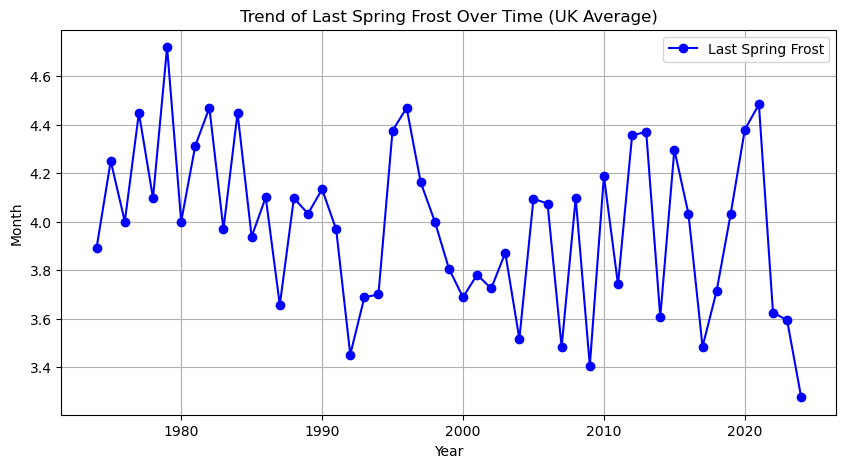

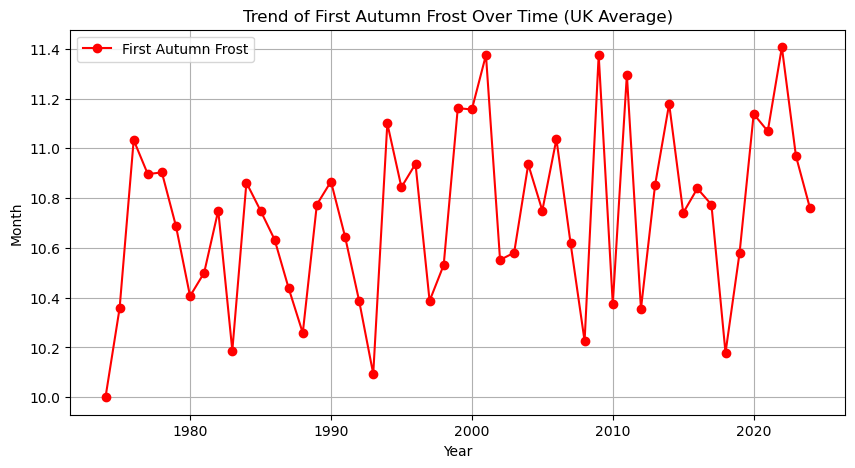

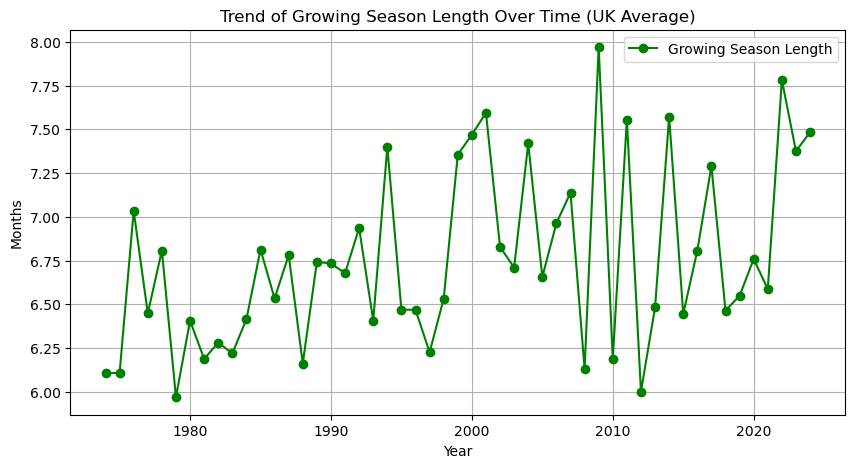

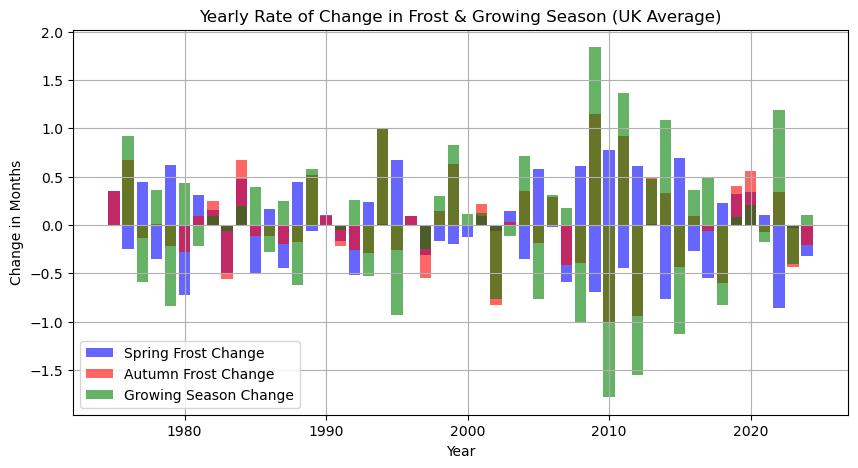

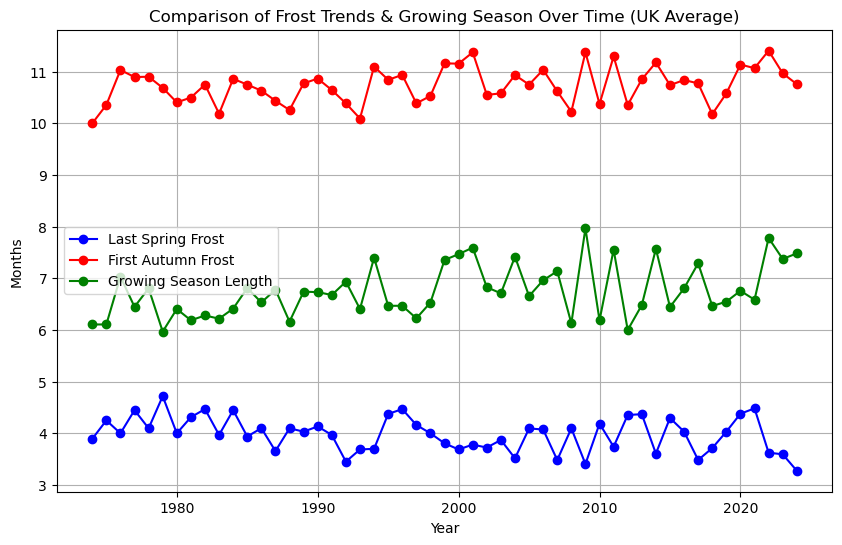

In [49]:
import numpy as np
import pandas as pd



# Filter only "Normal Frost Pattern" stations
df_normal = df[df["Frost_Type"] == "Normal Frost Pattern"]

# Compute UK-wide averages for each year
uk_frost_data = df_normal.groupby("Year")[["Last_Spring_Frost", "First_Autumn_Frost", "Growing_Season"]].mean().reset_index()

# Compute yearly rate of change
uk_frost_data["Spring_Frost_Change"] = uk_frost_data["Last_Spring_Frost"].diff()
uk_frost_data["Autumn_Frost_Change"] = uk_frost_data["First_Autumn_Frost"].diff()
uk_frost_data["Growing_Season_Change"] = uk_frost_data["Growing_Season"].diff()

# Compute overall trend (linear regression slope)
spring_frost_slope = np.polyfit(uk_frost_data["Year"], uk_frost_data["Last_Spring_Frost"], 1)[0]
autumn_frost_slope = np.polyfit(uk_frost_data["Year"], uk_frost_data["First_Autumn_Frost"], 1)[0]
growing_season_slope = np.polyfit(uk_frost_data["Year"], uk_frost_data["Growing_Season"], 1)[0]

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="UK Frost Change Analysis", dataframe=uk_frost_data)

# Print trend rates
spring_frost_slope, autumn_frost_slope, growing_season_slope



In [53]:
import numpy as np
import pandas as pd

# 📂 Load the dataset
file_path = r"C:\Users\magar\OneDrive\Desktop\SAS Curiosity CUp\Dataset\Growing_Season_Calculation_Updated.xlsx"

# Load the "Station Level Data" sheet
df = pd.read_excel(file_path, sheet_name="Station Level Data")

# 🔍 Filter only "Normal Frost Pattern" stations
df_normal = df[df["Frost_Type"] == "Normal Frost Pattern"]

# 📊 Compute UK-wide averages for each year
uk_frost_data = df_normal.groupby("Year")[["Last_Spring_Frost", "First_Autumn_Frost", "Growing_Season"]].mean().reset_index()

# 📉 Compute yearly rate of change
uk_frost_data["Spring_Frost_Change"] = uk_frost_data["Last_Spring_Frost"].diff()
uk_frost_data["Autumn_Frost_Change"] = uk_frost_data["First_Autumn_Frost"].diff()
uk_frost_data["Growing_Season_Change"] = uk_frost_data["Growing_Season"].diff()

# 📈 Compute overall trend (linear regression slope)
spring_frost_slope = np.polyfit(uk_frost_data["Year"], uk_frost_data["Last_Spring_Frost"], 1)[0]
autumn_frost_slope = np.polyfit(uk_frost_data["Year"], uk_frost_data["First_Autumn_Frost"], 1)[0]
growing_season_slope = np.polyfit(uk_frost_data["Year"], uk_frost_data["Growing_Season"], 1)[0]

# 📢 Print Summary
print("🌍 **UK Frost Trend Analysis Summary** 🌍\n")
print(uk_frost_data.describe())

print(f"\n📈 Rate of Change Per Year:")
print(f"🔹 Last Spring Frost is shifting by {spring_frost_slope:.4f} months per year.")
print(f"🔹 First Autumn Frost is shifting by {autumn_frost_slope:.4f} months per year.")
print(f"🔹 Growing Season is changing by {growing_season_slope:.4f} months per year.")

# 📝 Save results to a CSV file
output_path = r"C:\Users\magar\OneDrive\Desktop\SAS Curiosity CUp\Dataset\UK_Frost_Trend_Analysis.csv"
uk_frost_data.to_csv(output_path, index=False)
print(f"\n✅ Frost trend analysis saved to: {output_path}")


🌍 **UK Frost Trend Analysis Summary** 🌍

              Year  Last_Spring_Frost  First_Autumn_Frost  Growing_Season  \
count    51.000000          51.000000           51.000000       51.000000   
mean   1999.000000           3.982142           10.735447        6.753305   
std      14.866069           0.336399            0.349491        0.510868   
min    1974.000000           3.275862           10.000000        5.968750   
25%    1986.500000           3.707143           10.468750        6.410022   
50%    1999.000000           4.000000           10.750000        6.677419   
75%    2011.500000           4.218750           10.953125        7.085632   
max    2024.000000           4.718750           11.406250        7.968750   

       Spring_Frost_Change  Autumn_Frost_Change  Growing_Season_Change  
count            50.000000            50.000000              50.000000  
mean             -0.012340             0.015172               0.027512  
std               0.431575             0.47457